# ANÁLISIS INICIAL DATOS BURSÁTILES

¡Bienvenidos al capítulo de Análisis de Datos Bursátiles con Python! En este notebook, exploraremos las herramientas y técnicas necesarias para analizar datos financieros y tomar decisiones informadas en el mundo de las inversiones.

**Temas a Tratar**

Durante este capítulo, abordaremos una variedad de temas relacionados con el análisis de datos bursátiles. Algunos de los temas clave que exploraremos incluyen:

1. DESCARGA DE DATOS

Aprenderemos cómo descargar datos OHLC históricos de precios de activos financieros, como acciones, índices, de fuentes como Yahoo Finance. También veremos cómo cargar datos desde archivos locales.

2. ANÁLISIS Y TRATAMIENTO INICIAL

Realizaremos un análisis inicial de los datos para comprender su estructura y contenido. Esto incluirá la exploración de estadísticas descriptivas básicas y la identificación de posibles problemas de calidad de datos.

Abordaremos cuestiones comunes en la manipulación de datos financieros, como la eliminación de valores faltantes (NaN), la alineación de datos en función de las fechas y la normalización de los precios.

3. GRÁFICOS DE PRECIOS

Aprenderemos a crear gráficos de precios que nos permitirán visualizar la evolución de los activos financieros a lo largo del tiempo. Exploraremos gráficos de líneas, gráficos de velas y gráficos de precios normalizados para comparar el rendimiento de diferentes activos.

4. CÁLCULO DE RENTABILIDADES Y VOLATILIDAD

Calcular las rentabilidades diarias, mensuales y anuales es esencial para evaluar el rendimiento de los activos financieros. También estudiaremos cómo calcular la volatilidad, una medida clave de riesgo en los mercados financieros.

5. DISTRIBUCIÓN DE RENTABILIDADES

Exploraremos la distribución de probabilidad de los retornos de los activos financieros. Comprender esta distribución es fundamental para la gestión de riesgos y la toma de decisiones de inversión.

In [1]:
%pip install yfinance
%pip install plotly
%pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\WorkingFloderPython\Intro-Python-Finanzas-2023\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\WorkingFloderPython\Intro-Python-Finanzas-2023\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\WorkingFloderPython\Intro-Python-Finanzas-2023\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import mplfinance as mpf
import scipy.stats as stats
import seaborn as sns

plt.style.use('ggplot')

## DESCARGA DE DATOS Y ANÁLISIS

LO PRIMERO VAMOS A ENTENDER EL SIGNIFICADO DE LOS DATOS OHLC QUE VAMOS A UTILIZAR

* OPEN: Precio de apertura del activo financiero
* HIGH: Precio máximo del activo financiero
* LOW: Precio mínimo del activo financiero
* CLOSE: Precio de cierre del activo financiero
* ADJ CLOSE: Precio de cierre ajustado por dividendos y splits. Es el precio que se utiliza para calcular las rentabilidades.
* VOLUME: Volúmen negociado en la sesión


Nos  bajamos los datos de Yahoo Finance:

In [2]:
start_date = '2010-01-01'
end_date = '2020-12-31'

san_OHLC_df = yf.download(tickers="SAN.MC", start = start_date, end = end_date)

# Atención a los fines de semana...
san_OHLC_df.head(7)


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10.740401,10.916778,10.740401,10.916778,4.662075,50597478
2010-01-05,10.926061,11.093154,10.926061,11.037456,4.713611,60515839
2010-01-06,11.037456,11.130286,10.986400,11.116361,4.747310,31775246
2010-01-07,11.111720,11.111720,10.958551,11.065305,4.725505,67351420
2010-01-08,11.130286,11.144210,10.981758,11.102437,4.741362,46517762
2010-01-11,11.121003,11.264889,11.121003,11.121003,4.749290,48375813
2010-01-12,11.121003,11.195267,10.912136,10.912136,4.660093,152143405


¿CUÁL ES LA DIFERENCIA ENTRE PRECIO DE CIERRE (Close) Y PRECIO DE CIERRE AJUSTADO (Adj Close)?

In [3]:
import mi_modulo as mm

mm.compare_equities(san_OHLC_df, 'Close', 'Adj Close')

Para entender la diferencia, vamos a analizar el efecto de los splits y de los dividendos en los precios de las acciones:

* Un **split** es una división de las acciones de una empresa en varias acciones. Por ejemplo, si una acción vale 100 euros y se hace un split de 1 a 2, entonces cada acción valdrá 50 euros. El número de acciones se duplica y el precio se divide por dos.

* Un **dividendo** es un pago que hace una empresa a sus accionistas. Por ejemplo, si una acción vale 100 euros y se paga un dividendo de 5 euros, entonces el precio de la acción bajará a 95 euros.

Descargamos los datos OHLC + Dividendos + Splits de Yahoo Finance

In [4]:
# Al usar "actions = True" se descargan los dividendos y splits
san_OHLCDS_df = yf.download(tickers="SAN.MC", start = start_date, end = end_date, actions = True)

mask = (san_OHLCDS_df['Dividends'] != 0) | (san_OHLCDS_df['Stock Splits'] != 0)
san_OHLCDS_df.loc[mask].head(7)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2010-02-01,9.450068,9.682142,9.380445,9.631086,4.162698,113044196,0.114125,0.000000
2010-05-03,8.647090,8.647090,8.429869,8.601604,3.806149,165446848,0.205921,0.000000
2010-08-02,9.208710,9.603237,9.208710,9.603237,4.307801,321624219,0.125537,0.000000
2010-10-15,8.729709,8.833678,8.708358,8.800259,3.997547,97520903,0.110467,0.000000
2011-01-17,7.954387,7.993975,7.826197,7.916684,3.645663,74682708,0.108611,1.015385
2011-05-02,8.011884,8.043932,7.874268,7.891235,3.732991,265810541,0.215629,0.000000
2011-08-01,6.899646,6.965626,6.543353,6.543353,3.153589,352184417,0.127468,0.000000


Comparamos Close, Adj Close, Dividendos y Splits

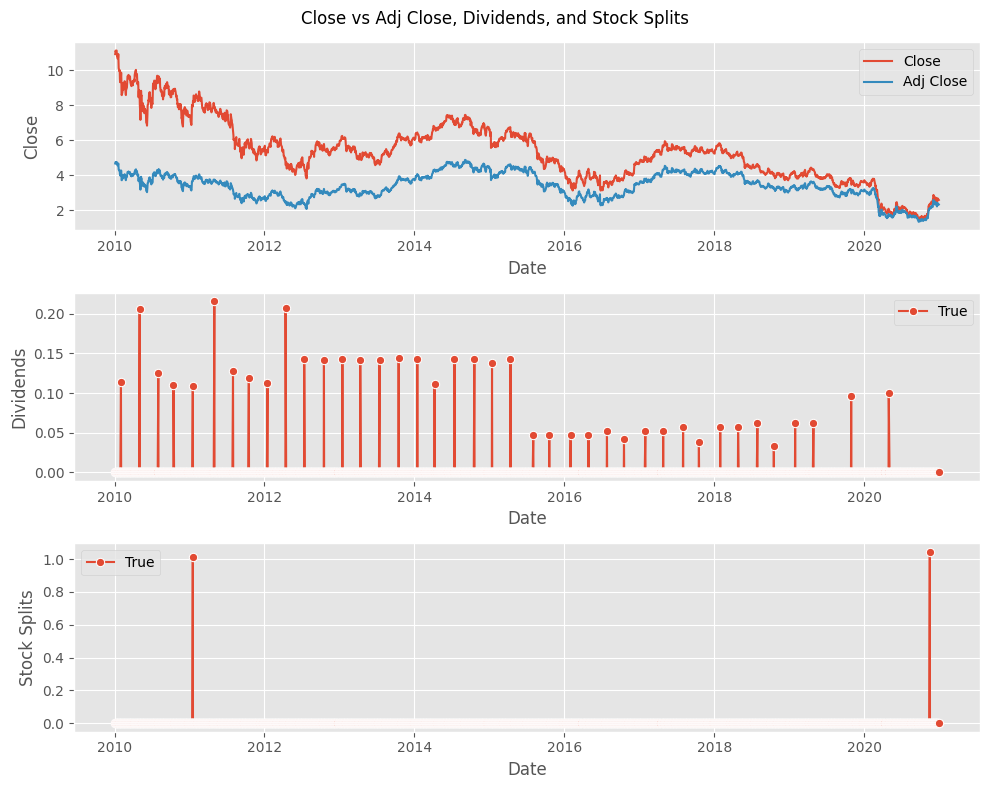

In [5]:
mm.plot_equities_dividends_splits(san_OHLCDS_df, "Close vs Adj Close, Dividends, and Stock Splits")

Hacemos el mismo ejercición con ENDESA, con el objetivo de averiguar qué pasó en octubre de 2014.

In [6]:
# Descargamos los datos de Endesa
endesa_OHLC_df = yf.download(tickers="ELE.MC", start = start_date, end = end_date)


[*********************100%%**********************]  1 of 1 completed


In [7]:
import mi_modulo as mm

mm.compare_equities(endesa_OHLC_df, 'Close', 'Adj Close')

Veamos qué pasó con los dividendos y los splits de Endesa en el periodo de la gráfica

In [8]:
# Al usar "actions = True" se descargan los dividendos y splits
endesa_OHLCDS_df = yf.download(tickers="ELE.MC", start = start_date, end = end_date, actions = True)

mask = (endesa_OHLCDS_df['Dividends'] != 0) | (endesa_OHLCDS_df['Stock Splits'] != 0)
endesa_OHLCDS_df.loc[mask].head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2010-01-04,23.469999,23.700001,23.334999,23.450001,5.519443,444270,0.500,0.0
2010-07-01,16.975000,17.205000,16.500000,16.930000,4.108831,1046699,0.528,0.0
2011-01-03,18.415001,18.975000,18.415001,18.605000,4.635465,940753,0.500,0.0
2011-07-01,22.795000,23.110001,22.424999,22.650000,5.773283,9331965,0.517,0.0
2012-07-02,13.450000,13.595000,13.190000,13.470000,3.590662,2182808,0.606,0.0


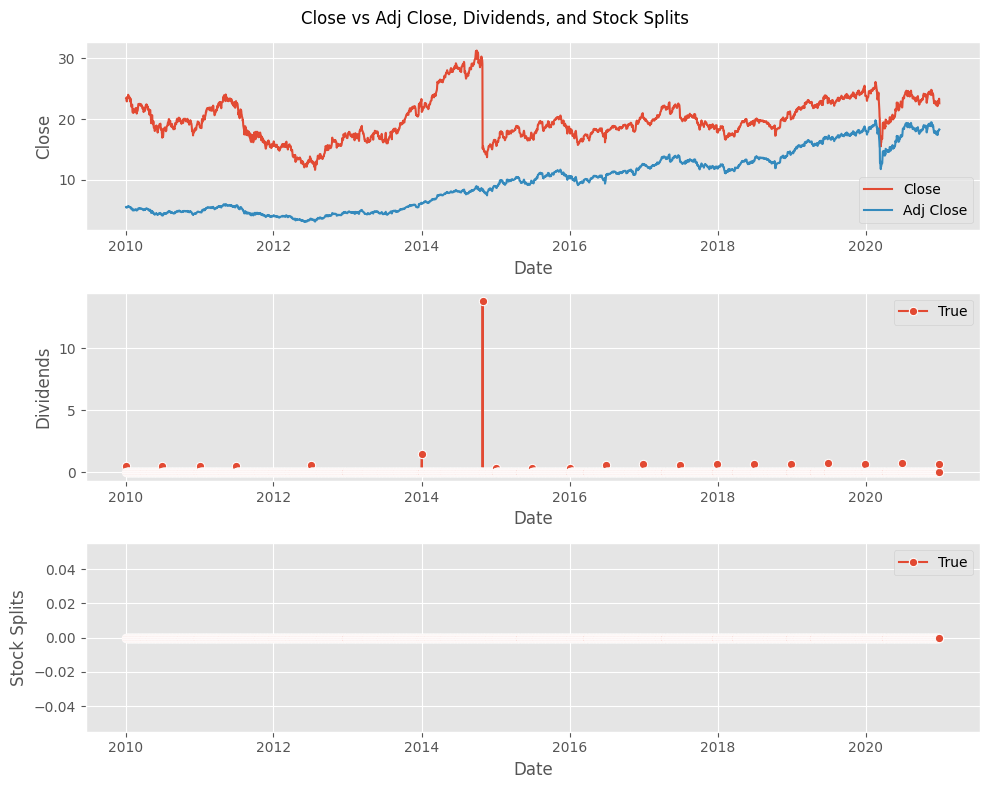

In [9]:
# Comparamos los precios de cierre y ajustado, con los dividendos y splits
mm.plot_equities_dividends_splits(endesa_OHLCDS_df, "Close vs Adj Close, Dividends, and Stock Splits")

AHORA NOS BAJAMOS DATOS DE ALGUNOS DE LOS ÍNDICES BURSÁTILES MÁS IMPORTANTES DEL MUNDO

In [10]:
# Definimos un diccionarios con los índices que vamos a utilizar
indices_dic = {'sp500': '^GSPC', # EEUU S&P 500
               'dax': '^GDAXI', # Alemania DAX 30
               'ftse': '^FTSE', # Londres FTSE 100
               'ibex': '^IBEX'} # España IBEX 35

In [11]:
# Nos bajamos los datos de Yahoo Finance
print(list(indices_dic.values()))
precios_OHLC = yf.download(list(indices_dic.values()))


['^GSPC', '^GDAXI', '^FTSE', '^IBEX']
[*********************100%%**********************]  4 of 4 completed


Inspeccionamos los datos

In [12]:
precios_OHLC.head(2)

Adj Close                     Close                      High  \
               ^FTSE ^GDAXI  ^GSPC ^IBEX ^FTSE ^GDAXI  ^GSPC ^IBEX ^FTSE   
Date                                                                       
1927-12-30       NaN    NaN  17.66   NaN   NaN    NaN  17.66   NaN   NaN   
1928-01-03       NaN    NaN  17.76   NaN   NaN    NaN  17.76   NaN   NaN   

                   ...    Low        Open                     Volume         \
           ^GDAXI  ...  ^GSPC ^IBEX ^FTSE ^GDAXI  ^GSPC ^IBEX  ^FTSE ^GDAXI   
Date               ...                                                        
1927-12-30    NaN  ...  17.66   NaN   NaN    NaN  17.66   NaN    NaN    NaN   
1928-01-03    NaN  ...  17.76   NaN   NaN    NaN  17.76   NaN    NaN    NaN   

                        
           ^GSPC ^IBEX  
Date                    
1927-12-30   0.0   NaN  
1928-01-03   0.0   NaN  

[2 rows x 24 columns]

In [13]:
# Columnas, con sus tipos y número de datos no nulos
precios_OHLC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24321 entries, 1927-12-30 to 2023-11-03
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, ^FTSE)   10064 non-null  float64
 1   (Adj Close, ^GDAXI)  9064 non-null   float64
 2   (Adj Close, ^GSPC)   24077 non-null  float64
 3   (Adj Close, ^IBEX)   7679 non-null   float64
 4   (Close, ^FTSE)       10064 non-null  float64
 5   (Close, ^GDAXI)      9064 non-null   float64
 6   (Close, ^GSPC)       24077 non-null  float64
 7   (Close, ^IBEX)       7679 non-null   float64
 8   (High, ^FTSE)        10064 non-null  float64
 9   (High, ^GDAXI)       9064 non-null   float64
 10  (High, ^GSPC)        24077 non-null  float64
 11  (High, ^IBEX)        7679 non-null   float64
 12  (Low, ^FTSE)         10064 non-null  float64
 13  (Low, ^GDAXI)        9064 non-null   float64
 14  (Low, ^GSPC)         24077 non-null  float64
 15  (Low, ^IBEX)       

In [14]:
# Algunos datos estadísticos básicos
precios_OHLC.describe()

Adj Close                                                   Close  \
              ^FTSE        ^GDAXI         ^GSPC         ^IBEX         ^FTSE   
count  10064.000000   9064.000000  24077.000000   7679.000000  10064.000000   
mean    4814.295936   6535.112575    602.261937   8784.783550   4814.295936   
std     1967.970810   4203.324170    961.897991   2616.608492   1967.970810   
min      986.900024    936.000000      4.400000   2822.197021    986.900024   
25%     3027.875000   2718.502502     24.540001   7726.596191   3027.875000   
50%     5300.050049   5750.424805    101.690002   9061.200195   5300.050049   
75%     6427.700073   9662.077393    985.489990  10309.194824   6427.700073   
max     8014.299805  16469.750000   4796.560059  15945.683594   8014.299805   

                                                         High                \
             ^GDAXI         ^GSPC         ^IBEX         ^FTSE        ^GDAXI   
count   9064.000000  24077.000000   7679.000000  10064.000000   9064.000000   
mean    6535.112575    602.261937   8784.790235   4844.262114   6580.506391   
std     4203.324170    961.897991   2616.610907   1980.267075   4227.551294   
min      936.000000      4.400000   2822.199951    991.099976    936.000000   
25%     2718.502502     24.540001   7726.600098   3037.550049   2739.092468   
50%     5750.424805    101.690002   9061.200195   5343.000000   5798.104980   
75%     9662.077393    985.489990  10309.200195   6466.524902   9733.585205   
max    16469.750000   4796.560059  15945.700195   8047.100098  16528.970703   

       ...           Low                        Open                \
       ...         ^GSPC         ^IBEX         ^FTSE        ^GDAXI   
count  ...  24077.000000   7679.000000  10064.000000   9064.000000   
mean   ...    598.335871   8711.229767   4813.959400   6535.733467   
std    ...    955.852672   2598.913703   1968.104291   4203.519403   
min    ...      4.400000   2814.100098    986.900024    936.000000   
25%    ...     24.540001   7642.149902   3023.824951   2715.844971   
50%    ...    100.910004   8989.500000   5298.900146   5747.034912   
75%    ...    974.809998  10222.250000   6429.275146   9677.972168   
max    ...   4780.040039  15868.599609   8014.299805  16434.660156   

                                         Volume                              \
              ^GSPC         ^IBEX         ^FTSE        ^GDAXI         ^GSPC   
count  24077.000000   7679.000000  1.006400e+04  9.064000e+03  2.407700e+04   
mean     582.183923   8786.368472  6.596551e+08  6.848720e+07  8.829377e+08   
std      972.975284   2617.575464  6.334472e+08  6.292035e+07  1.601037e+09   
min        0.000000   2825.199951  0.000000e+00  0.000000e+00  0.000000e+00   
25%        9.590000   7732.349854  0.000000e+00  0.000000e+00  1.470000e+06   
50%       41.389999   9065.099609  6.669114e+08  7.146565e+07  1.950000e+07   
75%      985.489990  10316.200195  1.048477e+09  1.050755e+08  8.728000e+08   
max     4804.509766  15999.200195  4.420947e+09  5.101956e+08  1.145623e+10   

                     
              ^IBEX  
count  7.679000e+03  
mean   9.699226e+07  
std    1.248950e+08  
min    0.000000e+00  
25%    8.750000e+04  
50%    2.786000e+05  
75%    1.879678e+08  
max    9.752120e+08  

[8 rows x 24 columns]

<Axes: >

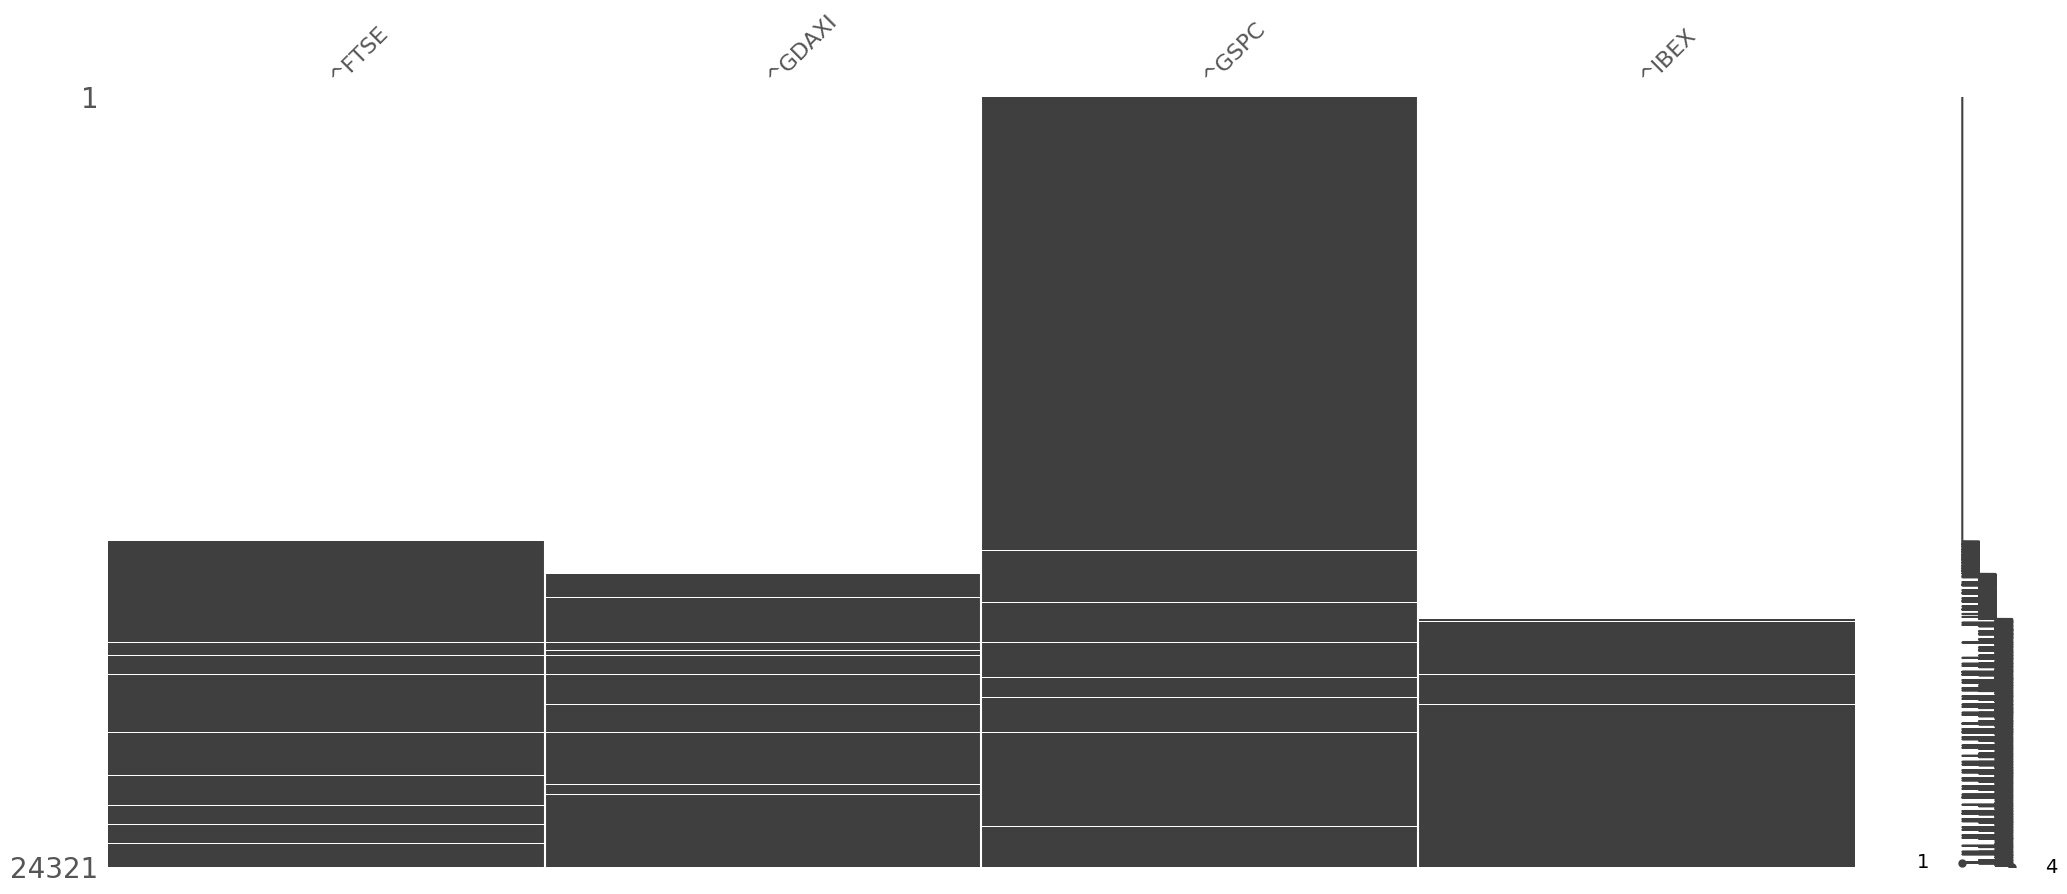

In [15]:
# Inspeccionamos los datos nulos
import missingno as msno

msno.matrix(precios_OHLC.loc[:, "Adj Close"])

Veo cómo se puede accerder a los datos

In [16]:
precios_OHLC.loc[:,'Close'].head(2)

,^FTSE,^GDAXI,^GSPC,^IBEX
Date,,,,
1927-12-30,NaN,NaN,17.66,NaN
1928-01-03,NaN,NaN,17.76,NaN


Genero un dataframe con los valores OHLC del S&P 500

In [17]:
precios_OHLC.columns

MultiIndex([('Adj Close',  '^FTSE'),
            ('Adj Close', '^GDAXI'),
            ('Adj Close',  '^GSPC'),
            ('Adj Close',  '^IBEX'),
            (    'Close',  '^FTSE'),
            (    'Close', '^GDAXI'),
            (    'Close',  '^GSPC'),
            (    'Close',  '^IBEX'),
            (     'High',  '^FTSE'),
            (     'High', '^GDAXI'),
            (     'High',  '^GSPC'),
            (     'High',  '^IBEX'),
            (      'Low',  '^FTSE'),
            (      'Low', '^GDAXI'),
            (      'Low',  '^GSPC'),
            (      'Low',  '^IBEX'),
            (     'Open',  '^FTSE'),
            (     'Open', '^GDAXI'),
            (     'Open',  '^GSPC'),
            (     'Open',  '^IBEX'),
            (   'Volume',  '^FTSE'),
            (   'Volume', '^GDAXI'),
            (   'Volume',  '^GSPC'),
            (   'Volume',  '^IBEX')],
           )

Dos formas de extrarer los datos de un índice concreto

In [18]:
# Defino el ticker que voy a utilizar
ticker = indices_dic['sp500']


In [19]:
# Genero el dataframe usando un diccionario
sp500_OHLC = pd.DataFrame({
    'Open': precios_OHLC['Open'][ticker],
    'High': precios_OHLC['High'][ticker],
    'Low': precios_OHLC['Low'][ticker],
    'Close': precios_OHLC['Close'][ticker],
    'Adj Close': precios_OHLC['Adj Close'][ticker],
    'Volume': precios_OHLC['Volume'][ticker]
})

sp500_OHLC.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,17.66,0.0
1928-01-03,17.76,17.76,17.76,17.76,17.76,0.0


<img src="img/00_multi_index.png">

In [20]:
# slice(None) se utiliza para seleccionar todas las columnas en un índice multi-nivel
sp500_OHLC_2 = precios_OHLC.loc[:, (slice(None), ticker)].droplevel(1, axis=1)
sp500_OHLC_2.head(2)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,17.66,0.0
1928-01-03,17.76,17.76,17.76,17.76,17.76,0.0


Genero un dataframe con los valores de cierre de los índices

In [21]:
# Me quedo con los datos de cierre ajustados
precios_df = precios_OHLC['Adj Close']

# Cambio los nombres a las columnas
precios_df.columns = list(indices_dic.keys())

precios_df.head(2)

,sp500,dax,ftse,ibex
Date,,,,
1927-12-30,NaN,NaN,17.66,NaN
1928-01-03,NaN,NaN,17.76,NaN


Vamos a realizar una gráfica de velas con los precios del sp500 del año 2018 

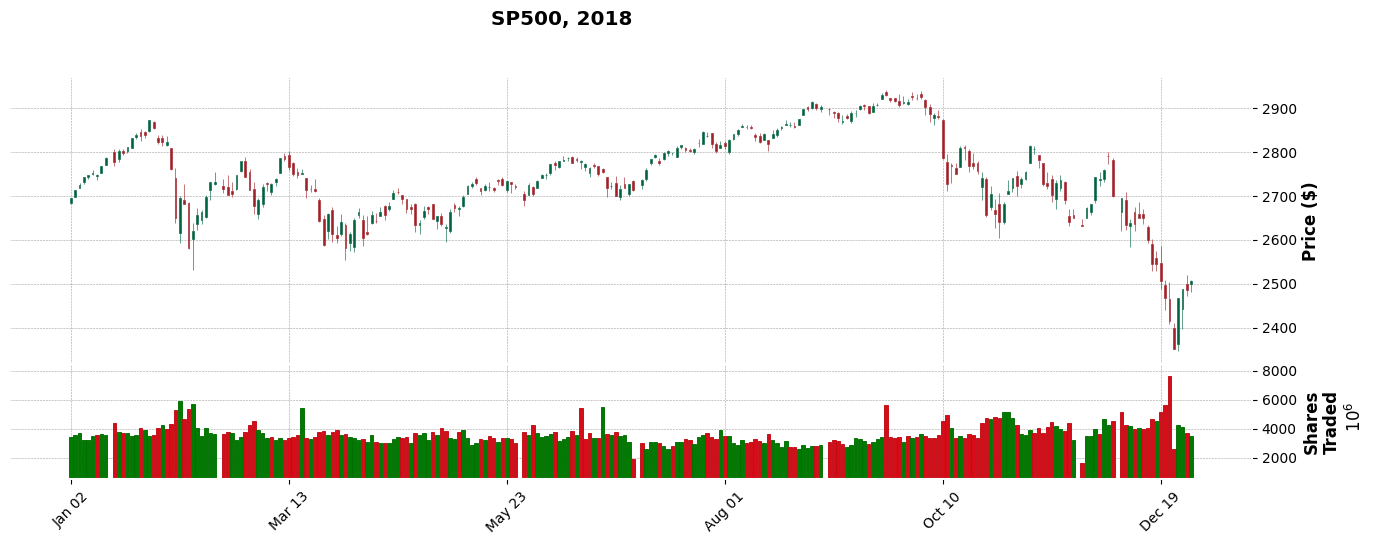

In [22]:
mpf.plot(
            sp500_OHLC.loc['2018'], #seleccionamos los datos de 2018
            type='candle', #tipo de gráfico
            style='charles', #estilo del gráfico
            title='SP500, 2018',
            ylabel='Price ($)',
            volume=True, #añade el gráfico de volumen
            ylabel_lower='Shares\nTraded',
            figratio=(30, 10), #tamaño del gráfico
            )

EJERCICIO: Crea una gráfica de velas con los datos del mes de julio del año 2018 del índice sp500

## ANÁLISIS Y TRATAMIENTO INICIAL

A PARTIR DE AHORA VAMOS A TRABAJAR CON LOS PRECIOS DE CIERRE AJUSTADOS

Hago un gráfico inicial

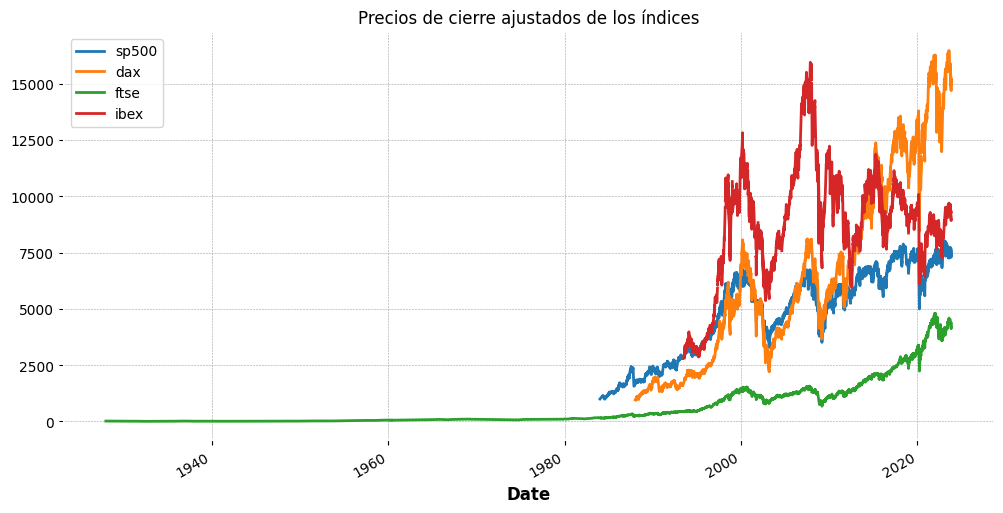

In [23]:
precios_df.plot(figsize=(12,6));
plt.title('Precios de cierre ajustados de los índices');

Veo que el SP500 tiene valores durante un periodo de tiempo más amplio que el resto de índices. Voy a quedarme con el periodo de tiempo que tienen todos los índices

<Axes: >

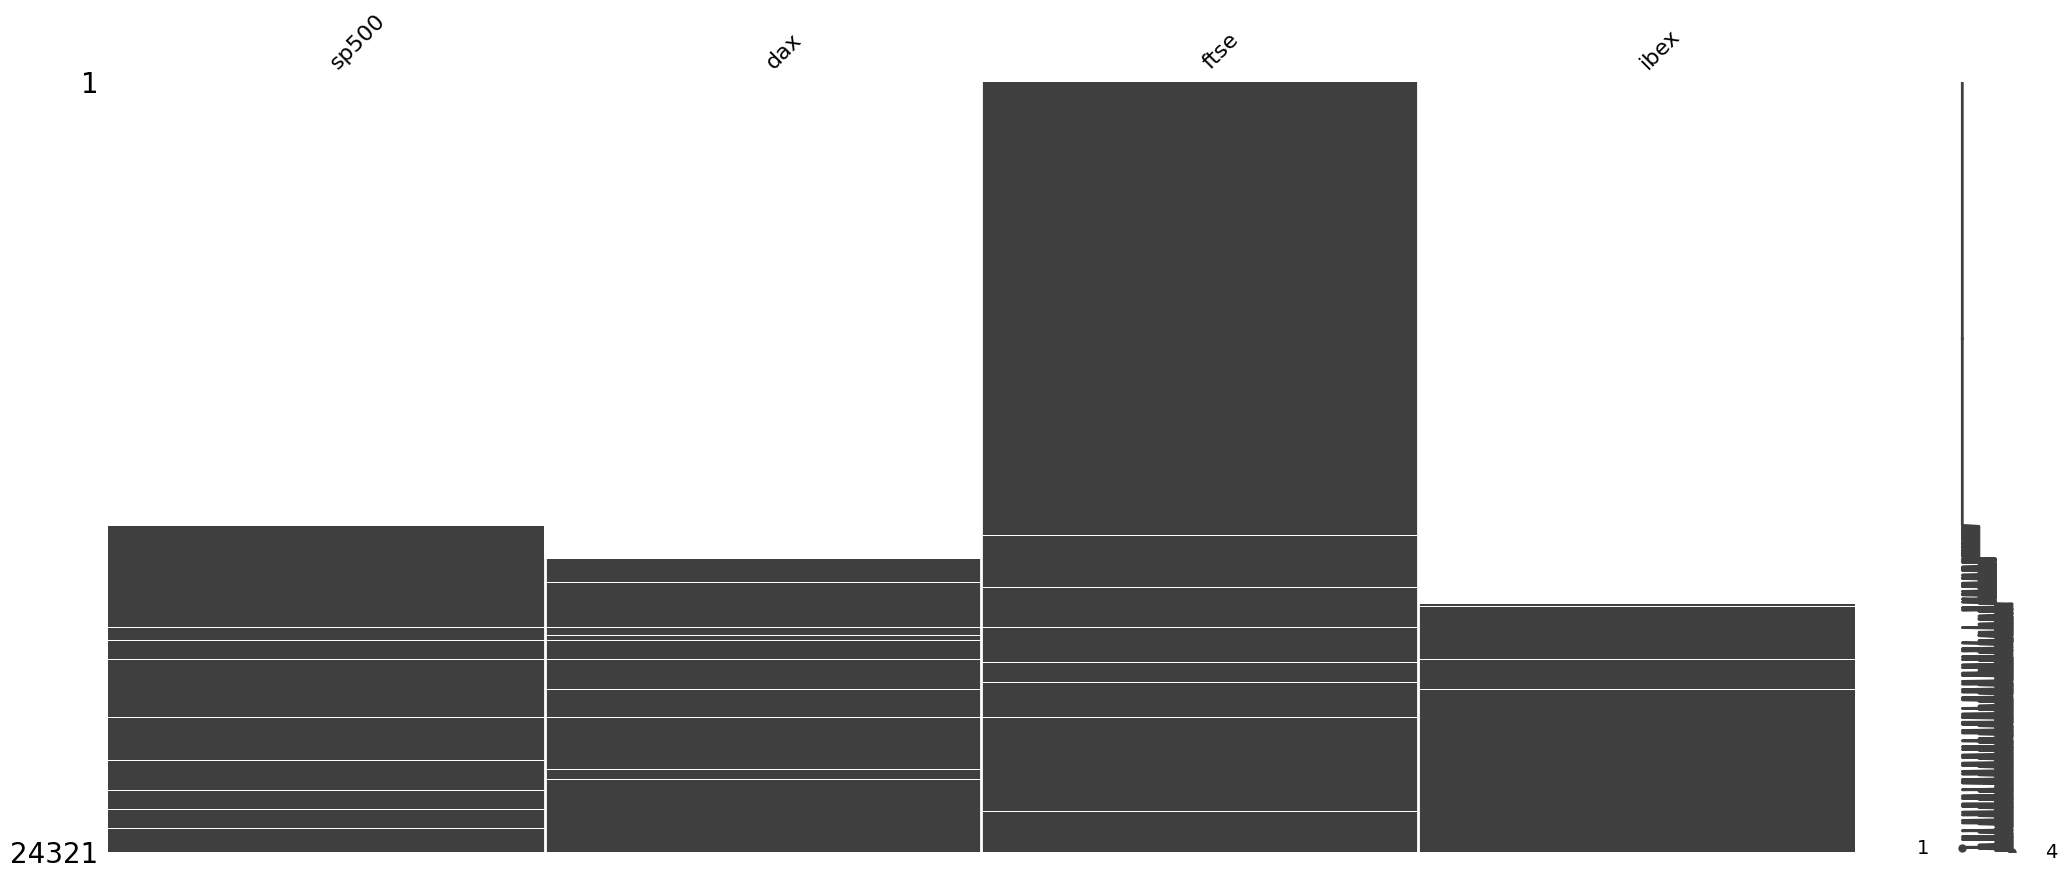

In [24]:
# Inspeccionamos los datos nulos
import missingno as msno

msno.matrix(precios_df)

In [25]:
# Comprobamos el número de datos no nulos por serie
precios_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24321 entries, 1927-12-30 to 2023-11-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp500   10064 non-null  float64
 1   dax     9064 non-null   float64
 2   ftse    24077 non-null  float64
 3   ibex    7679 non-null   float64
dtypes: float64(4)
memory usage: 950.0 KB


In [26]:
# Seleccionamos los datos desde la primera fecha válida del IBEX
mask = precios_df.index >= precios_df.loc[:, "ibex"].first_valid_index()
precios_df = precios_df.loc[mask]

<Axes: >

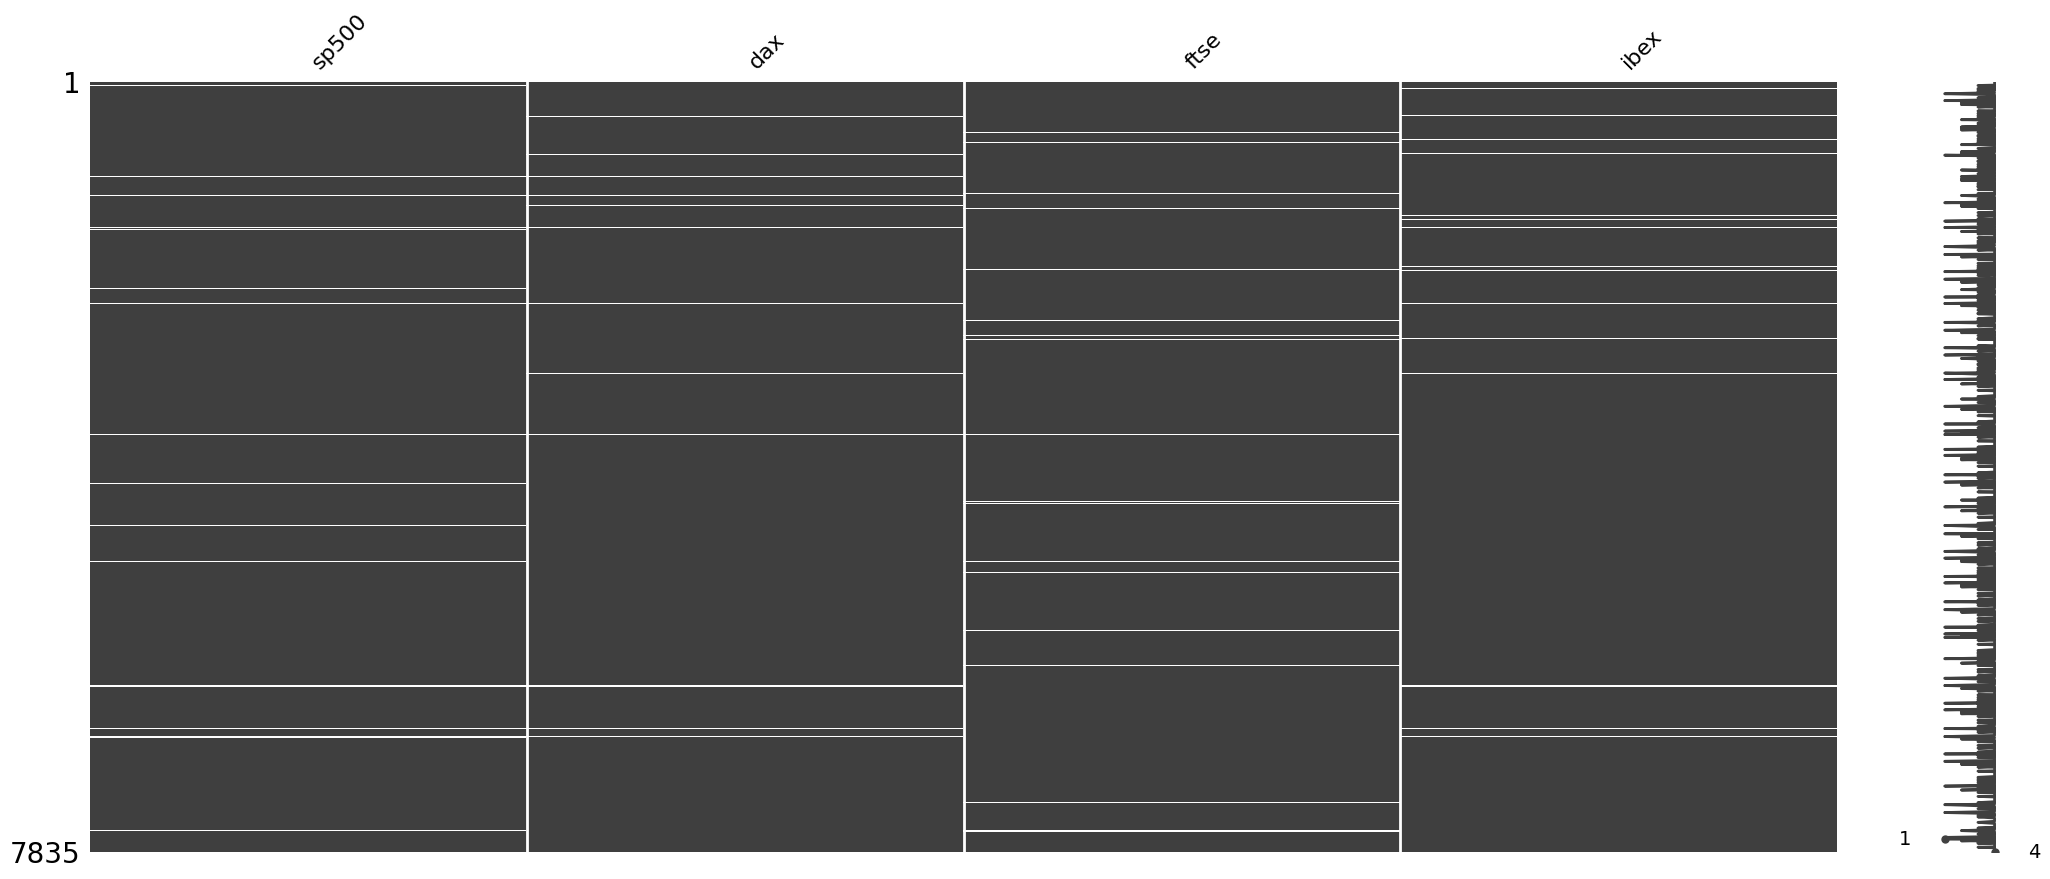

In [27]:
msno.matrix(precios_df)

Los nulos que nos quedan coinciden con las fiestas nacionales para cada uno de los índices, de modo que tenemos que decidir qué hacer:
* ¿Repetir el último valor?
* ¿Eliminar esas filas?

La práctica habitual en este caso es eliminar esas filas, ya que no representan datos reales del mercado y no se eliminan demasiados valores. Esto se hace para evitar distorsiones en el análisis y la comparación de los índices bursátiles.

In [28]:
# Filas con al menos un valor a NaN
precios_df.dropna(how='any' ,inplace=True)
precios_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7338 entries, 1993-07-12 to 2023-11-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp500   7338 non-null   float64
 1   dax     7338 non-null   float64
 2   ftse    7338 non-null   float64
 3   ibex    7338 non-null   float64
dtypes: float64(4)
memory usage: 286.6 KB


C:\Users\pvent\AppData\Local\Temp\ipykernel_21408\4106312015.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

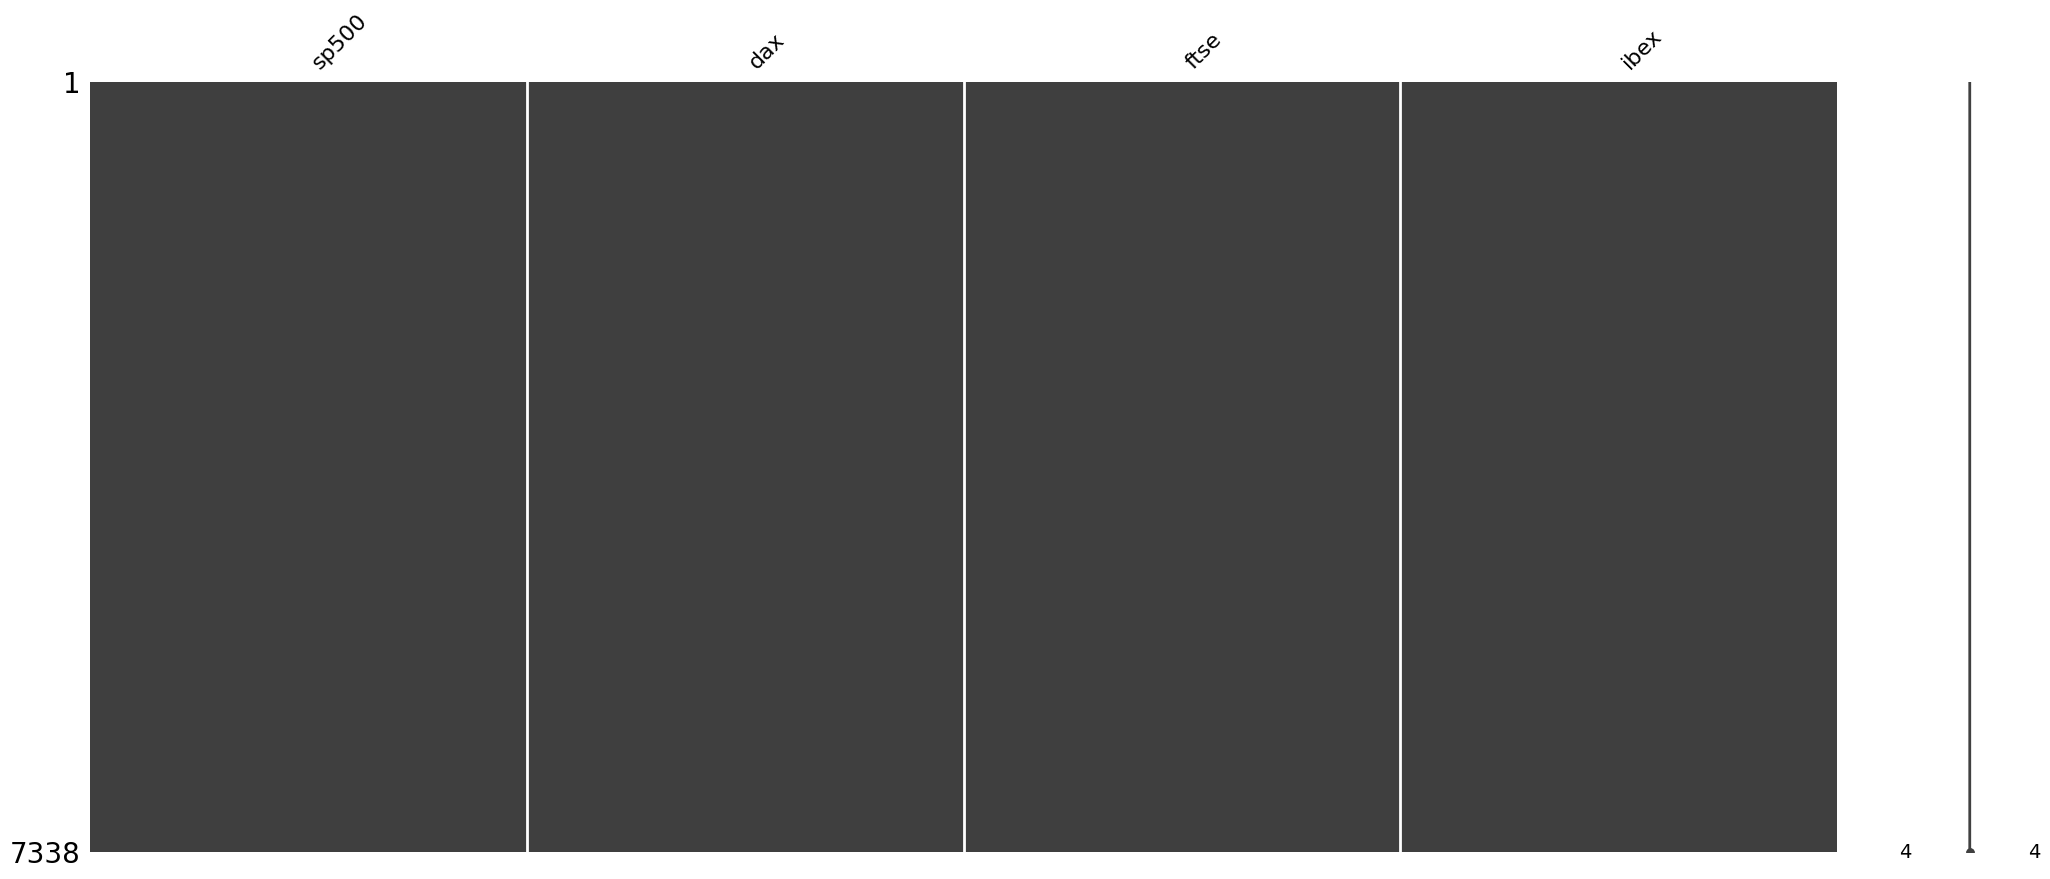

In [29]:
msno.matrix(precios_df)

VUELVO A HACER LA GRÁFICA CON LOS PRECIOS

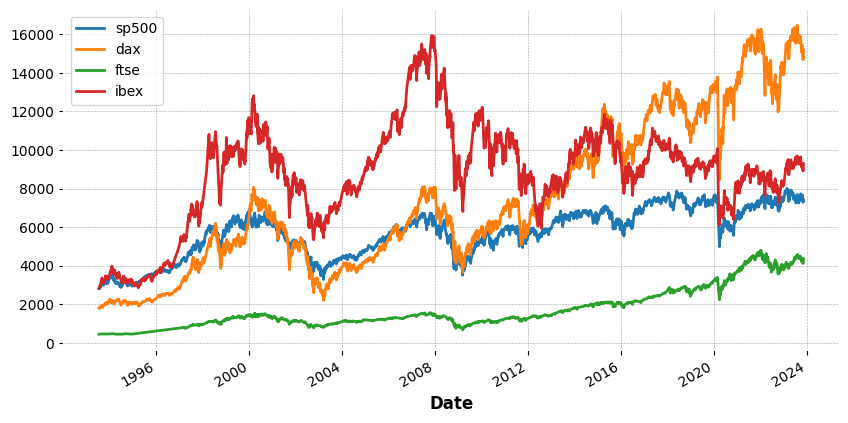

In [30]:
precios_df.plot(figsize=(10,5));

Para poder comparar los índices, normalizamos los datos

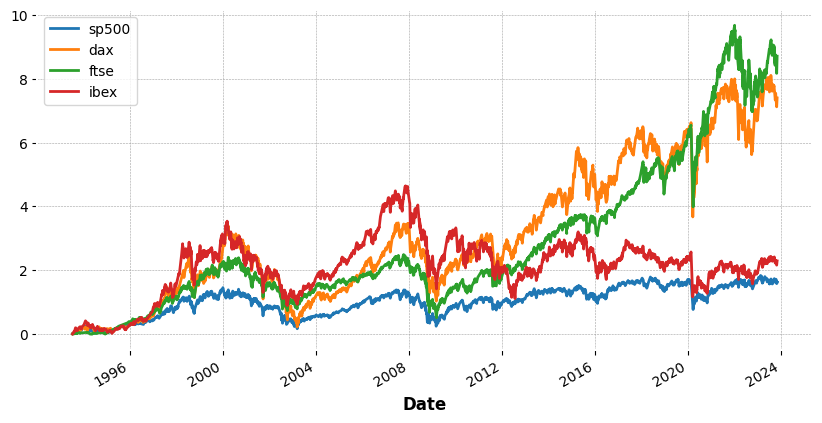

In [31]:
# Dividimos los precios por el primer valor, de forma que calculamos una rentabilidad acumulada, y restamos 1 para que empiece en 0
precios_unif_df = (precios_df / precios_df.iloc[0]) - 1

precios_unif_df.plot(figsize=(10,5));

Veamos ahora qué ocurre si tenemos dos fuentes de datos distintas, tendremos que mezclar y normalizar los datos

Leemos los datos del Ibex desde ficheros csv

In [32]:
# Cargamos los datos

# Para ejecutar en local
# ibex = pd.read_csv('data/ibex.csv', index_col=0, parse_dates=True).close
# ibex_div = pd.read_csv('data/ibex_div.csv', index_col=0, parse_dates=True).close

# Para ejecutar en colab
ibex = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex.csv', index_col=0, parse_dates=True)
ibex_div = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex_div.csv', index_col=0, parse_dates=True)

# Nos quedamos con la columna de cierre
ibex = ibex.loc[:, 'close']
ibex_div = ibex_div.loc[:, 'close']

# Concatenamos los dos dataframes
data_ibex = pd.concat([ibex, ibex_div], axis=1).dropna()
data_ibex.columns = ['ibex', 'ibex_div']

data_ibex

,ibex,ibex_div
2003-07-30,6984.3,9755.3
2003-07-31,7061.7,9755.3
2003-08-01,6995.4,9785.1
2003-08-04,6945.0,9714.6
2003-08-05,6991.3,9779.3
...,...,...
2019-05-09,9095.2,25794.9
2019-05-10,9117.5,25858.0
2019-05-13,9046.8,25657.6
2019-05-14,9127.6,25899.2


Hacemos unas gráficas iniciales

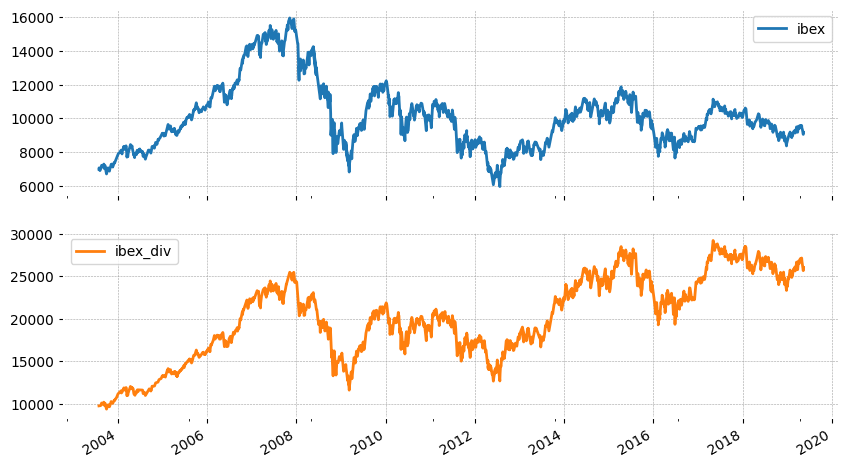

In [33]:
# Usamos "subplots = True" para mostrar las dos series en dos gráficos separados
data_ibex.plot(subplots=True, figsize=(10, 6));

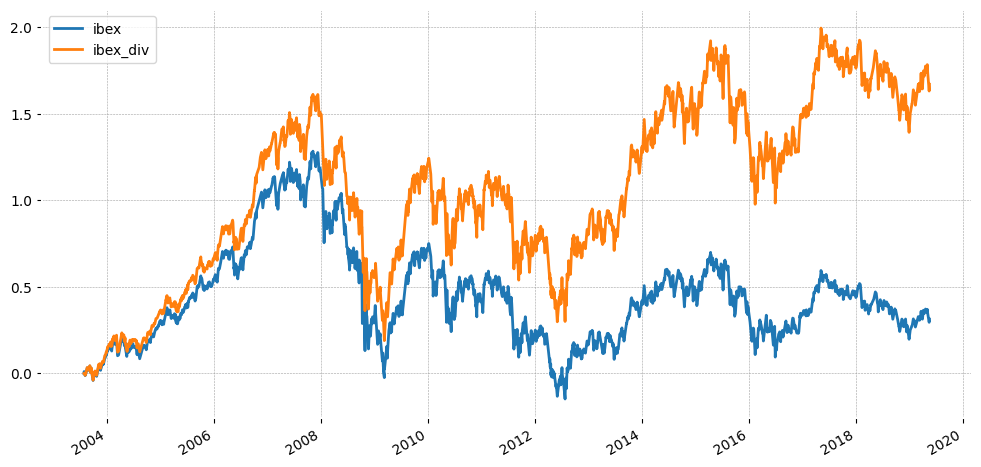

In [34]:
# Normalizamos los datos para poder comparar y unificamos las gráficas.
ibex_unif = (data_ibex / data_ibex.iloc[0]) - 1

ibex_unif.plot(figsize=(12, 6));

Juntamos los datos que hemos cargado desde CSV con los que hemos descargado de Yahoo Finance.

Pensemos si tiene sentido hacer esto:
* Repetimos un índice.
* Los datos son incrementos relativos acumulados desde fechas distintas.

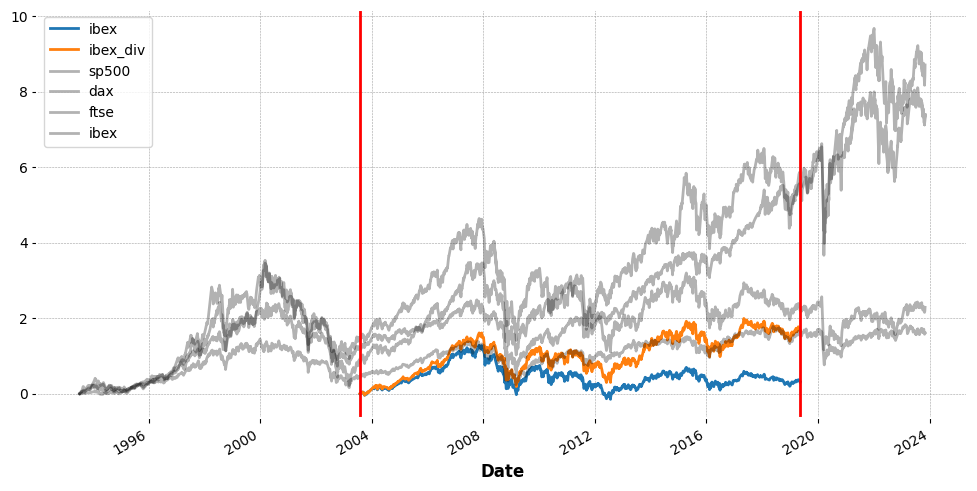

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))

# Datos cargados desde CSV
ibex_unif.plot(ax=ax)

# Datos descargados de Yahoo Finance
precios_unif_df.plot(ax=ax, color='k', alpha=0.3);

# Añadimos una línea vertical en la fecha de inicio y fin de los datos cargados desde CSV
plt.axvline(x=ibex_unif.index[0],color='r')
plt.axvline(x=ibex_unif.index[-1],color='r');


Para que tenga sentido, reutilizamos los datos de precios y los unimos en un solo DataFrame del que nos quedamos solamente con los datos coincidentes por índice de fechas.

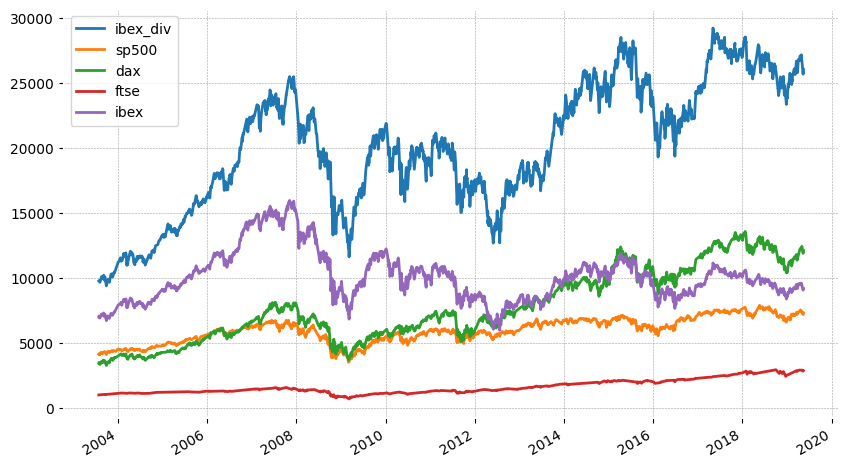

In [36]:
# Concatenamos los dos dataframes de precios en uno solo pero nos aseguramos de que las fechas sean las mismas
ind_fin_df = pd.concat([data_ibex['ibex_div'], precios_df], axis=1, join='inner')
ind_fin_df.dropna(inplace=True)

#hacemos un gráfico con los índices
ind_fin_df.plot(figsize=(10, 6));


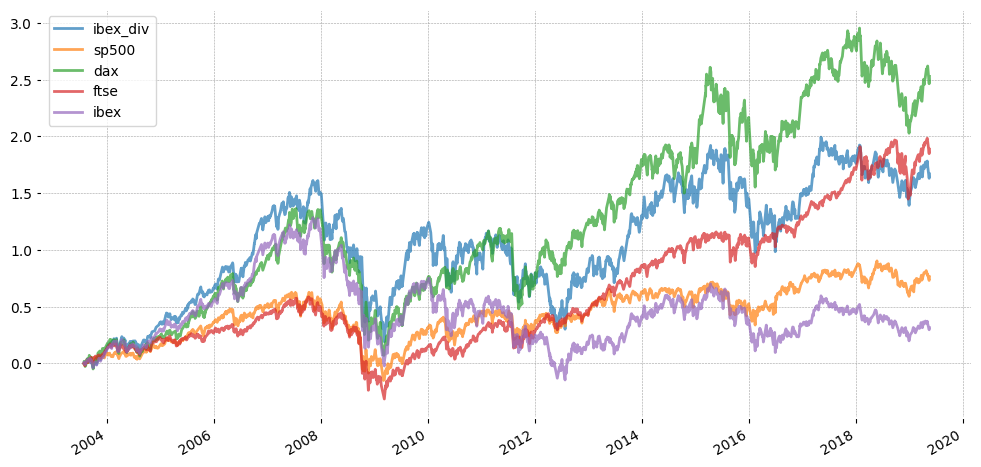

In [37]:
# Normalizamos los precios
ind_fin_unif_df = (ind_fin_df / ind_fin_df.iloc[0]) - 1

# Hacemos un gráfico con los índices normalizados
ind_fin_unif_df.plot(figsize=(12,6), alpha=0.7);

**CUIDADO**: Al comparar índices, tenemos que tener claro si incluyen o no dividendos. En este caso, el índice del Ibex no incluye dividendos.

## CÁLCULO DE RENTABILIDADES Y RIESGO

La teoría financiera siempre se ha caracterizado por:

* Los inversores tienen **aversión al riesgo**
* Los activos los representamos por el **binomio rentabilidad-riesgo**:
* La **rentabilidad** se mide como la media de los retornos
* El **riesgo** se mide a través de la volatilidad, que es la desviación estándar de los rendimientos.

Vamos a verlo con algunos datos reales.

### Primero calculamos los retornos

Existen dos formas de convertir precios en rendimientos:

* Rendimientos aritméticos: $r_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} -1$
* Rendimientos logarítmicos: $r_t = \log(\frac{P_t}{P_{t-1}})$

Los **rendimientos aritmeticos** se pueden sumar entre activos para obtener el rendimiento de la cartera. Los rendimientos logarítmicos no se pueden sumar.\
Los **rendimientos logarítmicos** se pueden sumar en el tiempo para obtener el rendimiento total. Los rendimientos aritméticos no se pueden sumar.

Los **rendimientos aritmético**s siguen una **distribución lognormal**.\
Los **rendimientos logarítmicos** siguen una **distribución normal**.

Los datos estadísticos siempre se calculan sobre los retornos logarítmicos, debido a que la serie de precios no es estacionaria y la serie de rendimientos logarítmicos es lo que más se aproximaría.

Veamos como se comportan los rendimientos aritméticos y logarítmicos para distintos valores de rendimiento:

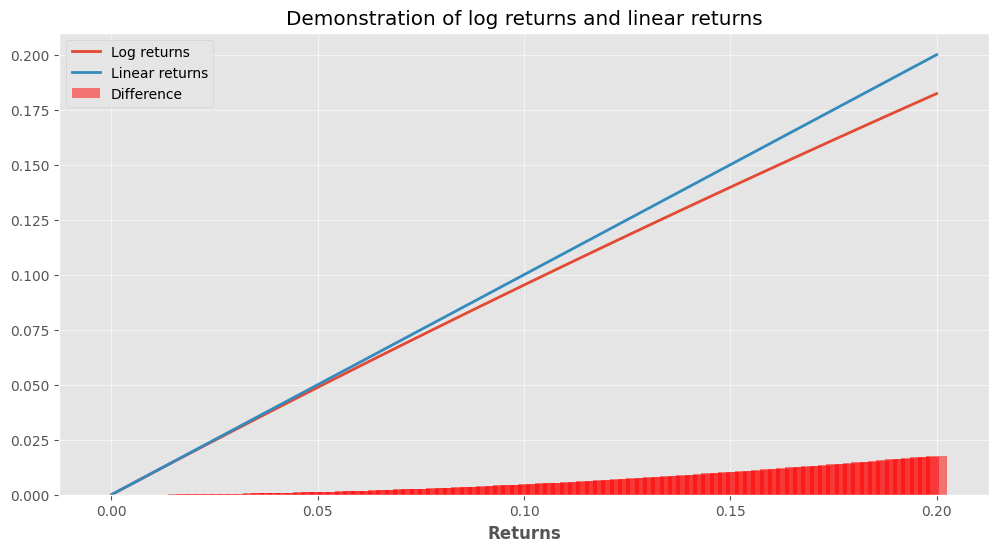

In [38]:
plt.style.use('ggplot')
x_returns = np.linspace(0.0001, .2, 100) # Generate 100 numbers between 0.0001 and 0.2
y_returns = np.log(1 + x_returns) # Calculate the logarithmic returns from the linear returns

# Plot the linear and log returns
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(x_returns, y_returns, label='Log returns') # Plot the log returns
plt.plot(x_returns, x_returns, label='Linear returns') # Plot the linear returns
plt.bar(x_returns, x_returns-y_returns, width=0.005, color='r', alpha=0.5, label='Difference', ) # Plot the difference between the two returns
plt.legend()
plt.xlabel('Returns')
plt.title('Demonstration of log returns and linear returns');

A partir de ahora vamos a trabajar con retornos logarítmicos.

VAMOS A CALCULAR RETORNOS DIARIOS, MENSUALES Y ANUALES

Calcula el retorno diario de un dataframe con los precios diarios

In [39]:
ret_df = np.log(ind_fin_df).diff().dropna()
ret_df

,ibex_div,sp500,dax,ftse,ibex
2003-07-31,0.000000,0.003808,0.017011,0.002852,0.011021
2003-08-01,0.003050,-0.014197,-0.014140,-0.010312,-0.009433
2003-08-04,-0.007231,0.000415,-0.009813,0.002720,-0.007231
2003-08-05,0.006638,0.005084,0.009659,-0.017821,0.006644
2003-08-06,-0.009628,-0.012355,-0.018404,0.001677,-0.009629
...,...,...,...,...,...
2019-05-09,-0.014383,-0.008786,-0.017059,-0.003026,-0.014387
2019-05-10,0.002443,-0.000569,0.007149,0.003713,0.002449
2019-05-13,-0.007780,-0.005513,-0.015306,-0.024426,-0.007785
2019-05-14,0.009372,0.010816,0.009634,0.007984,0.008892


Calcular los retornos mensuales de un dataframe con los precios diarios

In [40]:
# Primero calculamos los precios mensuales, para ello nos quedamos con los precios a final de mes
ind_fin_men_df = ind_fin_df.resample('M').last()
ind_fin_men_df.head(5)


,ibex_div,sp500,dax,ftse,ibex
2003-07-31,9755.3,4157.000000,3487.860107,990.309998,7061.692871
2003-08-31,9947.1,4161.100098,3484.580078,1008.010010,7111.292480
2003-09-30,9377.0,4091.300049,3256.780029,995.969971,6703.593262
2003-10-31,10055.5,4287.600098,3655.989990,1050.709961,7129.492676
2003-11-30,10250.0,4342.600098,3745.949951,1058.199951,7252.492676


In [41]:
# Calculamos los retornos mensuales
ret_fin_men = np.log(ind_fin_men_df).diff().dropna()
ret_fin_men.head(5)

,ibex_div,sp500,dax,ftse,ibex
2003-08-31,0.019470,0.000986,-0.000941,0.017715,0.006999
2003-09-30,-0.059021,-0.016917,-0.067609,-0.012016,-0.059040
2003-10-31,0.069860,0.046864,0.115628,0.053504,0.061596
2003-11-30,0.019158,0.012746,0.024308,0.007103,0.017105
2003-12-31,0.064691,0.029005,0.056871,0.047466,0.064694


Calcular los retornos anuales de un dataframe con los precios diarios

In [42]:
# Primero calculamos los precios anuales, para ello nos quedamos con los precios a final de año
ind_fin_año_df = ind_fin_df.resample('Y').last()
ind_fin_año_df.head(5)


,ibex_div,sp500,dax,ftse,ibex
2003-12-31,10935.0,4470.399902,3965.159912,1109.640015,7737.192383
2004-12-31,13241.2,4820.100098,4256.080078,1213.550049,9080.791016
2005-12-31,16152.2,5618.799805,5408.259766,1248.290039,10733.889648
2006-12-31,21974.0,6220.799805,6596.919922,1418.300049,14146.485352
2007-12-31,24327.5,6476.899902,8067.319824,1478.489990,15182.284180


In [43]:
# Calculamos los retornos anuales
ret_fin_año = np.log(ind_fin_año_df).diff().dropna()
ret_fin_año

,ibex_div,sp500,dax,ftse,ibex
2004-12-31,0.191365,0.075317,0.070802,0.089514,0.160122
2005-12-31,0.198723,0.153323,0.239579,0.028225,0.167245
2006-12-31,0.307804,0.101780,0.198675,0.127684,0.276060
2007-12-31,0.101747,0.040344,0.201218,0.041562,0.070663
2008-12-31,-0.454147,-0.388298,-0.517083,-0.506836,-0.501383
2009-12-31,0.324065,0.206066,0.213901,0.234859,0.261147
2010-12-31,-0.138428,0.100904,0.148937,0.110383,-0.191499
2011-12-31,-0.080644,-0.069107,-0.158903,-0.000223,-0.140559
2012-12-31,0.022949,0.061440,0.255105,0.109001,-0.052152
2013-12-31,0.247887,0.127520,0.226990,0.272140,0.197043


HACEMOS UN GRÁFICO DE BARRAS DE LOS RETORNOS ANUALES

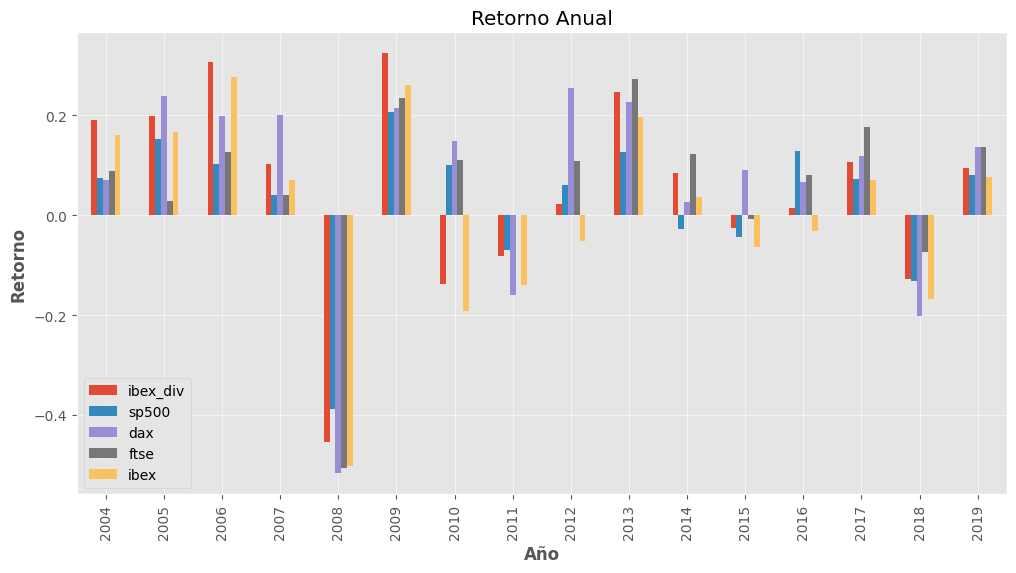

In [44]:
# Crear un gráfico de barras
ax = ret_fin_año.plot(kind='bar', legend=True, figsize=(12, 6))

# Configurar el eje X para mostrar solo los años
years = ret_fin_año.index.year
ax.set_xticklabels(years)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Retorno')
plt.title('Retorno Anual')

# Mostrar el gráfico
plt.show()

AHORA VAMOS A USAR DATOS DE ACCIONES DE ACTIVOS AMERICANOS

Nos bajamos dos grupos de activos que nos servirán para analizar distintas cosas más adelante

In [45]:
# Para correr en loacal
# data_OHLC_df = pd.read_excel('data/data_OHLC.xlsx', header=[0, 1], index_col=0, parse_dates=True)
# data_OHLC_df_corr = pd.read_excel('data/data_OHLC_corr.xlsx', header=[0, 1], index_col=0, parse_dates=True)

# Para correr en colab
data_OHLC_df_corr = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/7_Analisis_Info_Bolsa/data/data_OHLC.csv',
                                header=[0, 1],
                                index_col=0,
                                parse_dates=True)  

data_OHLC_df = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/7_Analisis_Info_Bolsa/data/data_OHLC_corr.csv',
                            header=[0, 1],
                            index_col=0,
                            parse_dates=True)

Nos quedamos con los datos de cierre de cada día y calculamos los rendimientos diarios.

In [46]:
# Datos de cierre
data_close_df = data_OHLC_df['Adj Close'].dropna()
data_close_df_corr = data_OHLC_df_corr['Adj Close'].dropna()

# Retornos logarítmicos diarios
ret_close_df = np.log(data_close_df).diff().dropna()
ret_close_df_corr = np.log(data_close_df_corr).diff().dropna()

In [48]:
# Puedes calcular los valores medios y la desviación estándar de cada columna así:
means = ret_close_df.mean()
stds = ret_close_df.std()
means_corr = ret_close_df_corr.mean()
stds_corr = ret_close_df_corr.std()

In [49]:
# Veamos los valores medios de cada columna
means

AAPL    0.000968
CSCO    0.000461
IBM     0.000081
INTC    0.000295
MSFT    0.000969
ORCL    0.000530
dtype: float64

In [51]:
# O también podemos hacerlo así
ret_close_df.describe()

,AAPL,CSCO,IBM,INTC,MSFT,ORCL
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,0.000968,0.000461,0.000081,0.000295,0.000969,0.000530
std,0.017917,0.015835,0.014796,0.020294,0.017066,0.016301
min,-0.137708,-0.147692,-0.137548,-0.198957,-0.159454,-0.144972
25%,-0.007251,-0.006571,-0.006408,-0.008719,-0.006787,-0.006375
50%,0.000951,0.000594,0.000447,0.000788,0.000835,0.000790
75%,0.010212,0.007938,0.007089,0.009898,0.009675,0.008065
max,0.113157,0.125517,0.107068,0.178324,0.132929,0.185875


Podemos analizar le rentabilidad y el riesgo de cada activo por separado y hacer una gráfica

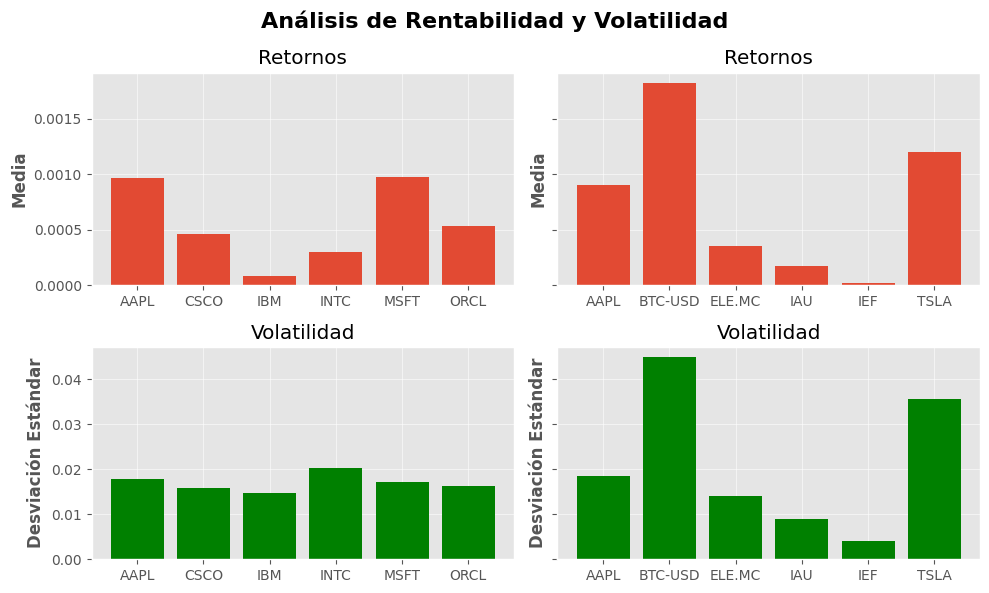

In [52]:
# Crear una figura con cuatro subplots, dos en cada una de las dos filas
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey='row')

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0, 0].bar(means.index, means.values)
axes[0, 0].set_ylabel('Media')
axes[0, 0].set_title('Retornos')

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1, 0].bar(stds.index, stds.values,color='green')
axes[1, 0].set_ylabel('Desviación Estándar')
axes[1, 0].set_title('Volatilidad')

#Crear una figura con dos subplots, uno encima del otro
axes[0, 1].bar(means_corr.index, means_corr.values)
axes[0, 1].set_ylabel('Media')
axes[0, 1].set_title('Retornos')

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1, 1].bar(stds_corr.index, stds_corr.values,color='green')
axes[1, 1].set_ylabel('Desviación Estándar')
axes[1, 1].set_title('Volatilidad')

# Añadir un título general a la figura
plt.suptitle('Análisis de Rentabilidad y Volatilidad', fontsize=16)  # Título general

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## DISTRIBUCIÓN DE RENTABILIDADES

Hemos calculado los retornos medios, ahora vamos a ver la distribución que siguen los retornos diarios.

Vemos que la distribución de los retornos diarios es muy parecida a una distribución normal, pero no es exactamente igual.

Media = 1.6351815705928286e-05


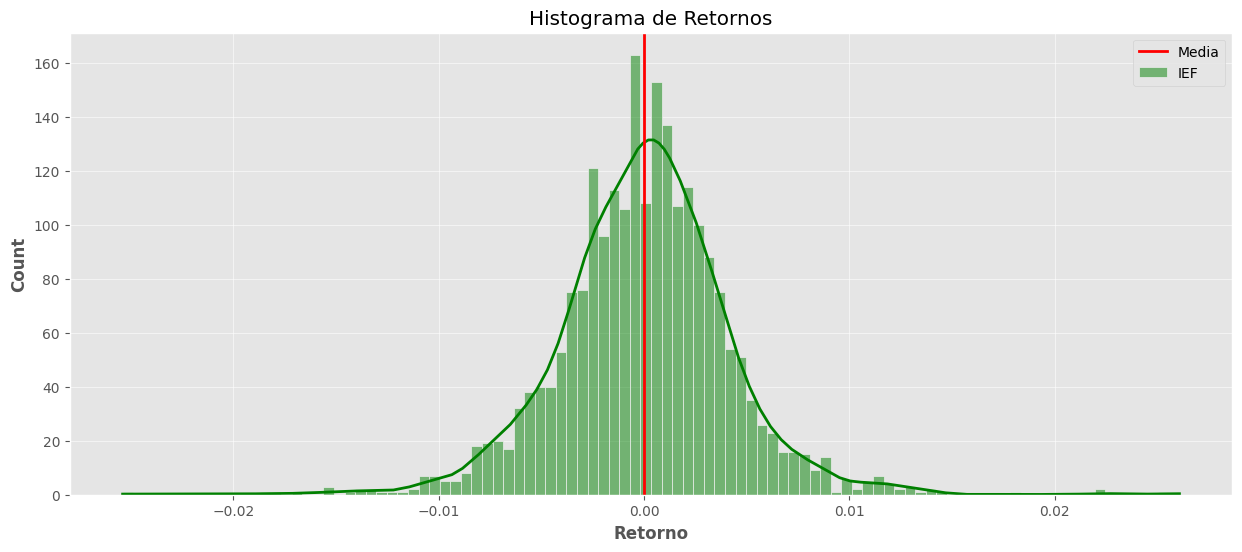

In [63]:
# Hacemos un histograma de los retornos de IEF
fig, ax1 = plt.subplots(figsize=(15, 6))

sns.histplot(data=ret_close_df_corr, x='IEF', ax=ax1, bins=100, color='green', kde=True, alpha=0.5, label='IEF')
ax1.axvline(x=ret_close_df_corr['IEF'].mean(),color='r', label='Media')
print(f"Media = {ret_close_df_corr['IEF'].mean()}")

ax1.set_xlabel('Retorno')
plt.legend()
plt.title('Histograma de Retornos');
plt.show()

Veamos qué ocurre si comparamos los retornos de los bonos (poca volatilidad) con los retornos de Bitcoin (mucha volatilidad)

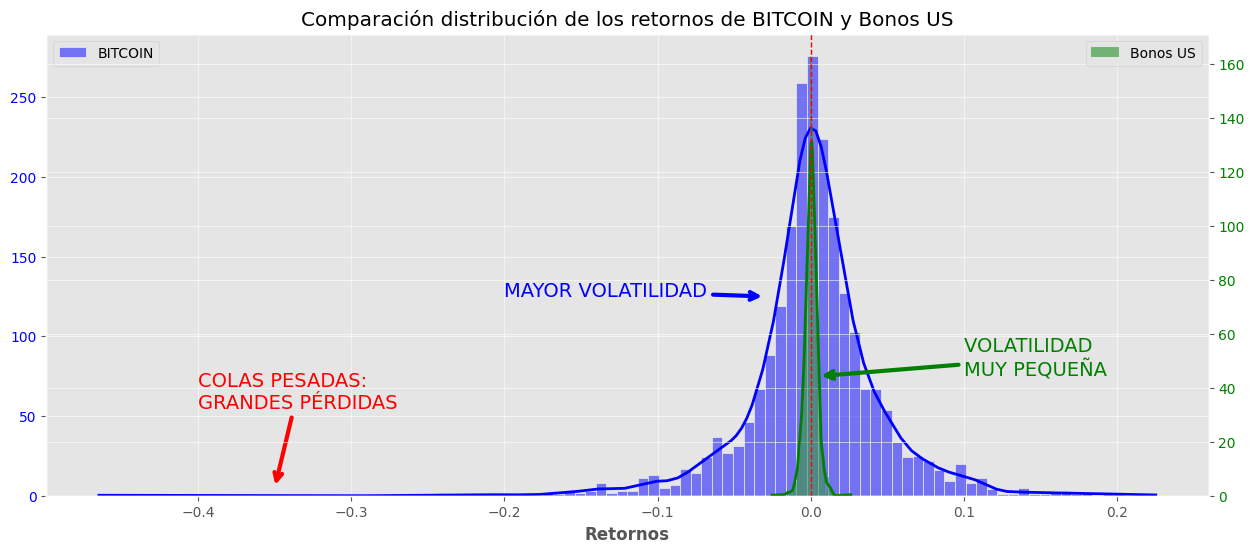

In [60]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Crear el primer gráfico con sns.histplot
sns.histplot(data=ret_close_df_corr, x='BTC-USD', ax=ax1, bins=100, color='blue', kde=True, alpha=0.5, label='BITCOIN')
ax1.set_xlabel('Retornos')
ax1.set_ylabel('', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# # Añadir texto en ax2
# text_x = -0.4
# text_y = 25

#ax1.text(-0.2, 125, f"MAYOR VOLATILIDAD", fontsize=12, color='blue')

ax1.annotate('MAYOR VOLATILIDAD', xy=(-0.03, 125), xytext=(-0.2, 125),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='blue'),
            fontsize=14, color='blue')

ax1.annotate('VOLATILIDAD \nMUY PEQUEÑA', xy=(0.005, 75), xytext=(0.1, 75),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='green'),
            fontsize=14, color='green')

ax1.annotate('COLAS PESADAS: \nGRANDES PÉRDIDAS', xy=(-0.35, 5), xytext=(-0.4, 55),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='red'),
            fontsize=14, color='RED')



# Duplicar el eje Y para el segundo gráfico
ax2 = ax1.twinx()

# Crear el segundo gráfico con sns.histplot
sns.histplot(data=ret_close_df_corr, x='IEF', ax=ax2, bins=100, color='green', kde=True, alpha=0.5, label='Bonos US')
ax2.set_ylabel('', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Añadir una línea vertical en el eje X en 0
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
# Configurar título y mostrar el gráfico
plt.title('Comparación distribución de los retornos de BITCOIN y Bonos US')
plt.show()